# Test Notebook

In [1]:
print("Hello, World!")

Hello, World!


## Section 1

### Sub section 1.1

# Sample Product Analysis Dataset

This notebook provides a small example dataset suitable for product-level analysis (sales, returns, ratings, country breakdown).

Columns:
- `product_id`: unique product identifier
- `product_name`: readable product name
- `category`: product category
- `launch_date`: product launch date
- `price`: unit price (USD)
- `units_sold`: total units sold in the period
- `return_rate`: fraction of sold units returned (0–1)
- `rating`: average customer rating (1–5)
- `country`: country of sale

In [2]:
# Create the sample dataset as a pandas DataFrame
import pandas as pd

data = pd.DataFrame([
    {"product_id":"P001","product_name":"AlphaPhone X","category":"Electronics","launch_date":"2023-01-10","price":799.0,"units_sold":1200,"return_rate":0.03,"rating":4.6,"country":"US"},
    {"product_id":"P002","product_name":"BetaWatch 3","category":"Electronics","launch_date":"2022-11-05","price":199.0,"units_sold":850,"return_rate":0.04,"rating":4.3,"country":"UK"},
    {"product_id":"P003","product_name":"CozyBlanket","category":"Home","launch_date":"2023-03-20","price":49.0,"units_sold":2300,"return_rate":0.02,"rating":4.8,"country":"US"},
    {"product_id":"P004","product_name":"PureBrew Kettle","category":"Home","launch_date":"2021-09-12","price":89.0,"units_sold":640,"return_rate":0.015,"rating":4.5,"country":"DE"},
    {"product_id":"P005","product_name":"EcoTee","category":"Apparel","launch_date":"2024-02-01","price":25.0,"units_sold":4100,"return_rate":0.06,"rating":4.2,"country":"US"},
    {"product_id":"P006","product_name":"FlexSneak","category":"Apparel","launch_date":"2022-04-18","price":120.0,"units_sold":980,"return_rate":0.05,"rating":4.4,"country":"UK"},
    {"product_id":"P007","product_name":"Glow Serum","category":"Beauty","launch_date":"2023-07-30","price":34.0,"units_sold":1500,"return_rate":0.08,"rating":4.1,"country":"US"},
    {"product_id":"P008","product_name":"NightLight Pro","category":"Electronics","launch_date":"2021-12-02","price":59.0,"units_sold":720,"return_rate":0.025,"rating":4.7,"country":"DE"},
    {"product_id":"P009","product_name":"KitchenMate Set","category":"Home","launch_date":"2024-05-15","price":149.0,"units_sold":300,"return_rate":0.01,"rating":4.9,"country":"US"},
    {"product_id":"P010","product_name":"Traveler Backpack","category":"Apparel","launch_date":"2020-06-10","price":89.0,"units_sold":1100,"return_rate":0.035,"rating":4.4,"country":"UK"}
])

# Basic preprocessing
data['launch_date'] = pd.to_datetime(data['launch_date'])
data['revenue'] = data['price'] * data['units_sold']
data['units_returned'] = (data['units_sold'] * data['return_rate']).round().astype(int)

# Display the dataset
data

,product_id,product_name,category,launch_date,price,units_sold,return_rate,rating,country,revenue,units_returned
0,P001,AlphaPhone X,Electronics,2023-01-10,799.0,1200,0.030,4.6,US,958800.0,36
1,P002,BetaWatch 3,Electronics,2022-11-05,199.0,850,0.040,4.3,UK,169150.0,34
2,P003,CozyBlanket,Home,2023-03-20,49.0,2300,0.020,4.8,US,112700.0,46
3,P004,PureBrew Kettle,Home,2021-09-12,89.0,640,0.015,4.5,DE,56960.0,10
4,P005,EcoTee,Apparel,2024-02-01,25.0,4100,0.060,4.2,US,102500.0,246
5,P006,FlexSneak,Apparel,2022-04-18,120.0,980,0.050,4.4,UK,117600.0,49
6,P007,Glow Serum,Beauty,2023-07-30,34.0,1500,0.080,4.1,US,51000.0,120
7,P008,NightLight Pro,Electronics,2021-12-02,59.0,720,0.025,4.7,DE,42480.0,18
8,P009,KitchenMate Set,Home,2024-05-15,149.0,300,0.010,4.9,US,44700.0,3
9,P010,Traveler Backpack,Apparel,2020-06-10,89.0,1100,0.035,4.4,UK,97900.0,39


In [3]:
# Quick summary and examples of common product-analysis calculations
import numpy as np

# Top-selling products by units
top_by_units = data.sort_values('units_sold', ascending=False).head(5)

# Highest revenue
top_by_revenue = data.sort_values('revenue', ascending=False).head(5)

# Average rating per category
avg_rating = data.groupby('category')['rating'].mean().reset_index().rename(columns={'rating':'avg_rating'})

# Returns rate weighted by units sold per category (overall return fraction)
returns = (data.assign(return_amount=data['units_sold'] * data['return_rate'])
                   .groupby('category')
                   .agg(total_units=('units_sold','sum'), total_returns=('return_amount','sum'))
                   .reset_index())
returns['overall_return_rate'] = returns['total_returns'] / returns['total_units']

# Show summaries
print("Top by units:")
print(top_by_units[['product_id','product_name','units_sold']])
print('\nTop by revenue:')
print(top_by_revenue[['product_id','product_name','revenue']])
print('\nAverage rating by category:')
print(avg_rating)
print('\nReturn summary by category:')
print(returns)

# Optionally save to CSV for use elsewhere
data.to_csv('sample_products.csv', index=False)

Top by units:
  product_id       product_name  units_sold
4       P005             EcoTee        4100
2       P003        CozyBlanket        2300
6       P007         Glow Serum        1500
0       P001       AlphaPhone X        1200
9       P010  Traveler Backpack        1100

Top by revenue:
  product_id  product_name   revenue
0       P001  AlphaPhone X  958800.0
1       P002   BetaWatch 3  169150.0
5       P006     FlexSneak  117600.0
2       P003   CozyBlanket  112700.0
4       P005        EcoTee  102500.0

Average rating by category:
      category  avg_rating
0      Apparel    4.333333
1       Beauty    4.100000
2  Electronics    4.533333
3         Home    4.733333

Return summary by category:
      category  total_units  total_returns  overall_return_rate
0      Apparel         6180          333.5             0.053964
1       Beauty         1500          120.0             0.080000
2  Electronics         2770           88.0             0.031769
3         Home         3240       

C:\Users\ejoaq\AppData\Local\Temp\ipykernel_38308\3987253302.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='category', y='units_sold', estimator=sum, ci=None)


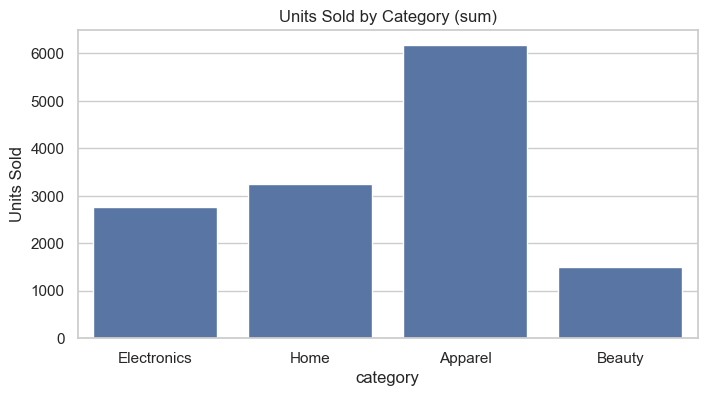

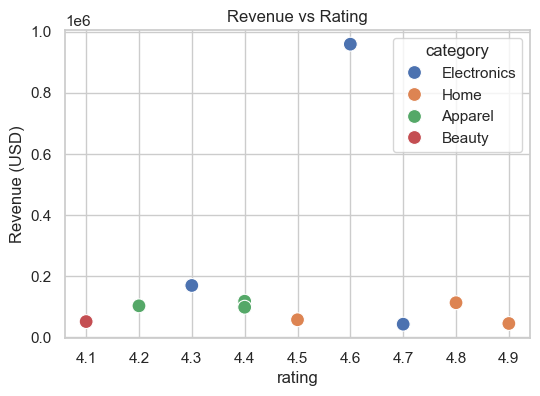

In [6]:
# Simple visualization example (requires matplotlib / seaborn)
import matplotlib.pyplot as plt
#%pip install seaborn
import seaborn as sns

sns.set(style='whitegrid')

# Units sold by category
plt.figure(figsize=(8,4))
sns.barplot(data=data, x='category', y='units_sold', estimator=sum, ci=None)
plt.title('Units Sold by Category (sum)')
plt.ylabel('Units Sold')
plt.show()

# Revenue vs Rating scatter
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='rating', y='revenue', hue='category', s=100)
plt.title('Revenue vs Rating')
plt.ylabel('Revenue (USD)')
plt.show()